<a href="https://colab.research.google.com/github/aasmik/Medicine-Disease-Predictor/blob/main/visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
import joblib

print("Script started.")

# File path to your dataset (change if needed)
file_path = r"/content/MEDICAL_DATASET.csv"

# 1. Check if dataset file exists
if not os.path.exists(file_path):
    raise FileNotFoundError(f"Dataset file not found at: {file_path}")
print(f"Dataset found at: {file_path}")

# 2. Load dataset
df = pd.read_csv(file_path)
print("\nInitial Dataset Info:")
print(df.info())

print("\nFirst few rows:")
print(df.head())

# 3. Drop missing values and duplicates
df_cleaned = df.dropna().drop_duplicates()

# 4. Standardize column names
df_cleaned.columns = df_cleaned.columns.str.strip().str.lower().str.replace(' ', '_')

# 5. Convert 'strength' column to numeric (extract digits only)
if 'strength' in df_cleaned.columns:
    df_cleaned['strength'] = df_cleaned['strength'].astype(str).str.extract(r'(\d+)', expand=False)
    df_cleaned['strength'] = pd.to_numeric(df_cleaned['strength'], errors='coerce').fillna(0)

# 6. Save cleaned dataset
os.makedirs('data', exist_ok=True)
df_cleaned.to_csv("data/cleaned_medicine_dataset.csv", index=False)
print("\nCleaned data saved to 'data/cleaned_medicine_dataset.csv'")

# 7. Encode categorical columns
X = df_cleaned.drop(columns=['indication'])
y = df_cleaned['indication']

label_encoders = {}
for col in X.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])
    label_encoders[col] = le

# Encode target separately
le_target = LabelEncoder()
y_encoded = le_target.fit_transform(y)

# 8. Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# 9. Train model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# 10. Evaluate model
train_pred = model.predict(X_train)
test_pred = model.predict(X_test)

print(f"\nTraining Accuracy: {accuracy_score(y_train, train_pred):.4f}")
print(f"Test Accuracy: {accuracy_score(y_test, test_pred):.4f}")

print("\nClassification Report (Test Data):")

# Important fix: get unique labels in y_test & use them in classification_report
unique_labels = np.unique(y_test)

# classification_report needs both labels & target_names arrays to match exactly in length
print(classification_report(y_test, test_pred, labels=unique_labels, target_names=le_target.classes_[unique_labels], zero_division=0))


# 11. Save model and encoders
os.makedirs('model', exist_ok=True)
joblib.dump(model, 'model/random_forest_model.joblib')
joblib.dump(label_encoders, 'model/label_encoders_dict.joblib')
joblib.dump(le_target, 'model/label_encoder_target.joblib')

print("\nModel and encoders saved in 'model/' folder.")
print("Script finished.")


Script started.
Dataset found at: /content/MEDICAL_DATASET.csv

Initial Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Name          201 non-null    object
 1   Category      201 non-null    object
 2   Dosage Form   201 non-null    object
 3   Strength      201 non-null    object
 4   Manufacturer  201 non-null    object
 5   Indication    201 non-null    object
dtypes: object(6)
memory usage: 9.6+ KB
None

First few rows:
           Name      Category Dosage Form Strength           Manufacturer  \
0      Metophen    Antifungal      Tablet   346 mg      Merck & Co., Inc.   
1     Cefcillin  Antidiabetic    Ointment   517 mg       Roche Holding AG   
2    Ibuprophen    Antifungal    Ointment   967 mg            AbbVie Inc.   
3  Ibupronazole    Antiseptic       Cream   747 mg  Eli Lilly and Company   
4   Amoxicillin     Analges

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199 entries, 0 to 198
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   name          199 non-null    object
 1   category      199 non-null    object
 2   dosage_form   199 non-null    object
 3   strength      199 non-null    int64 
 4   manufacturer  199 non-null    object
 5   indication    199 non-null    object
dtypes: int64(1), object(5)
memory usage: 9.5+ KB
None

Dataset description:
               name      category dosage_form     strength manufacturer  \
count           199           199         199   199.000000          199   
unique          120            39           9          NaN           48   
top     Amoxicillin  Antidiabetic      Tablet          NaN  Pfizer Inc.   
freq             12            35         107          NaN           23   
mean            NaN           NaN         NaN   330.613065          NaN   
std             NaN

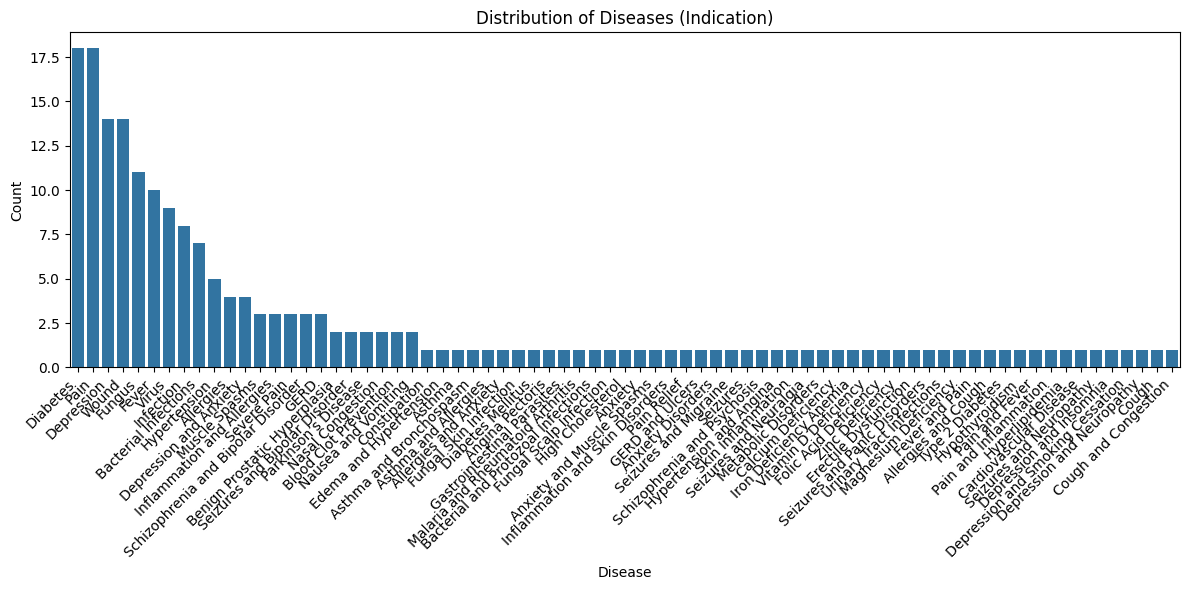

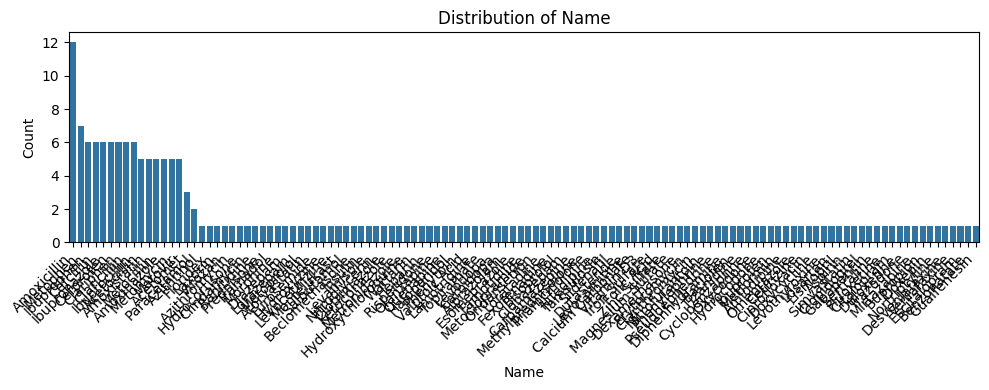

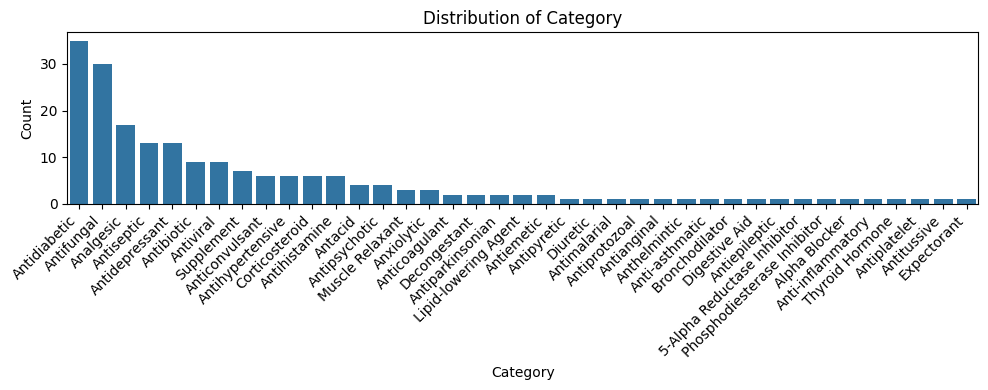

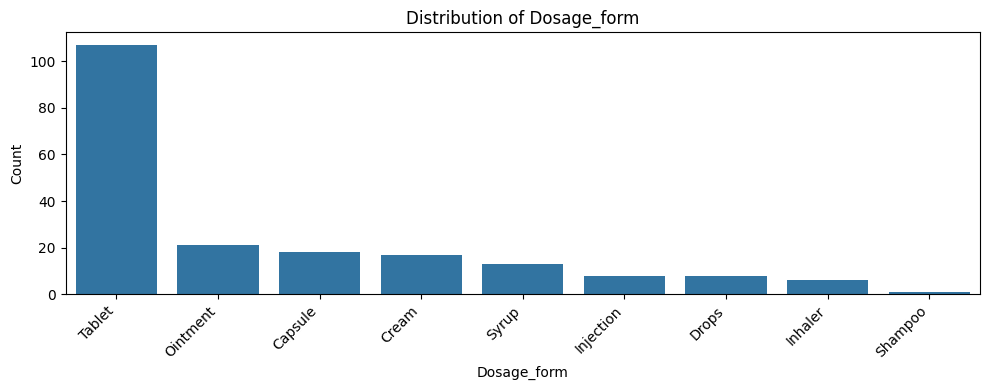

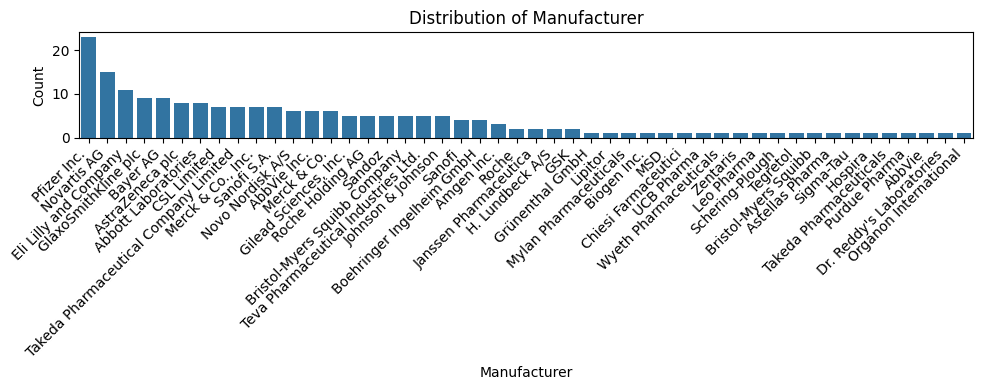

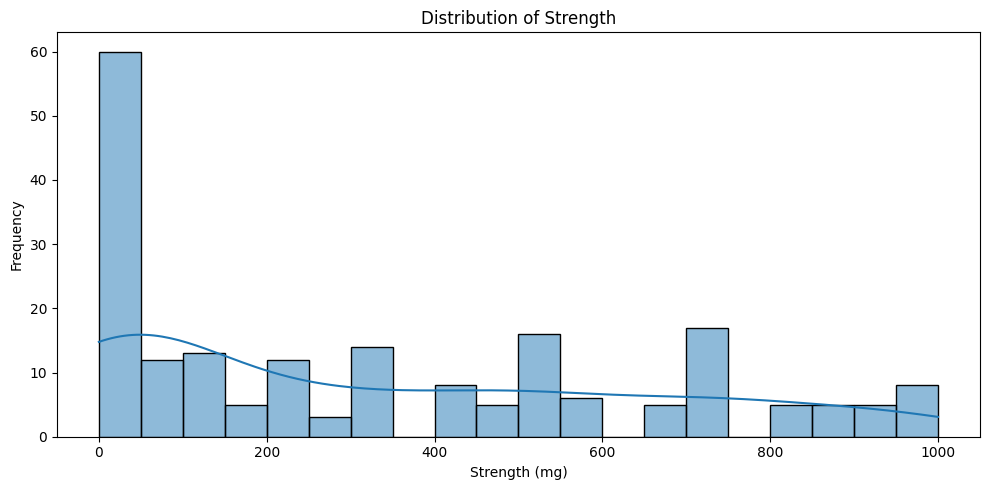

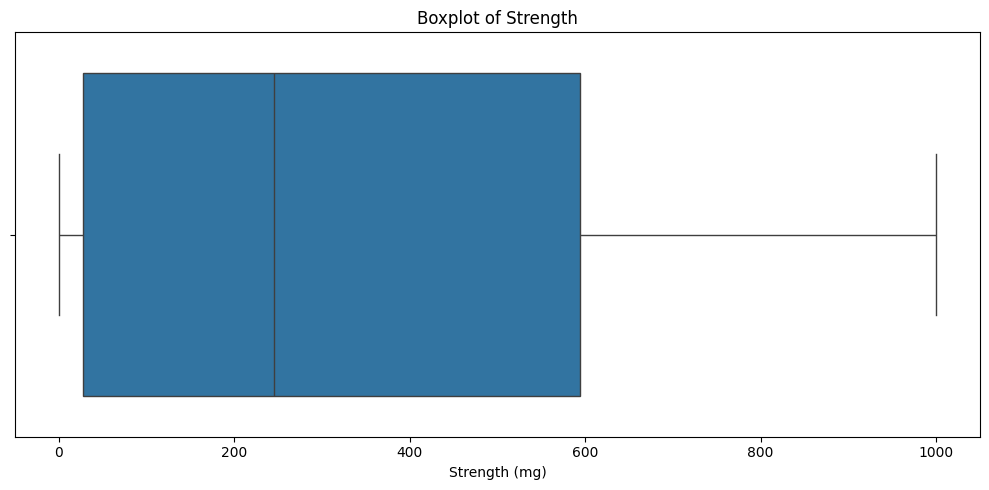

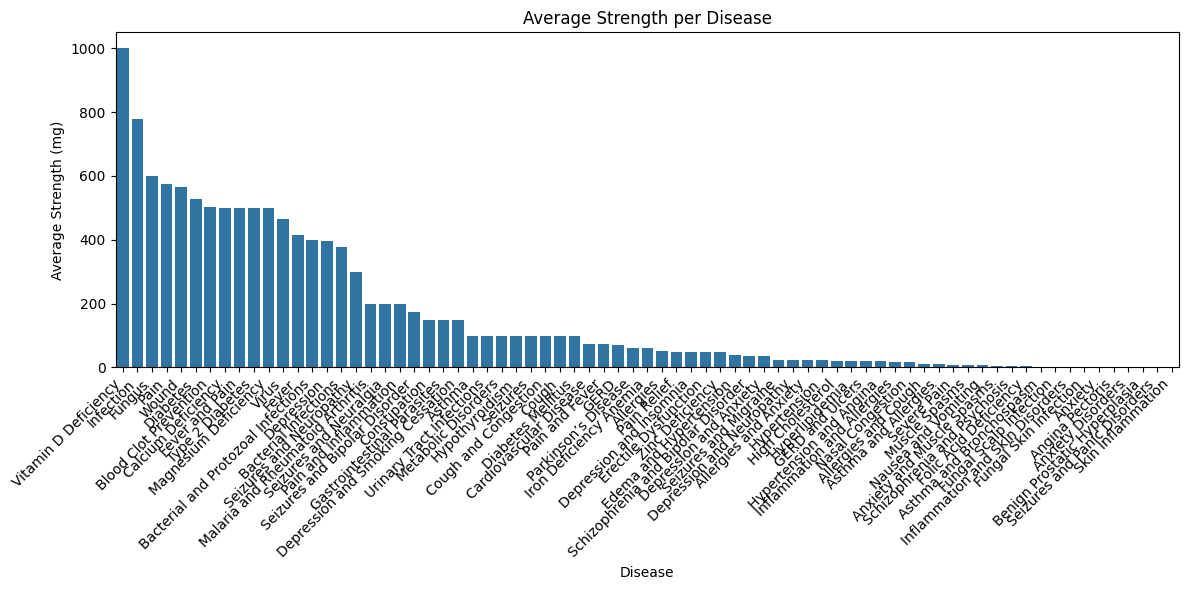

In [2]:
# Exploratory Data Analysis

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load cleaned dataset
df = pd.read_csv("data/cleaned_medicine_dataset.csv")

# Basic info
print("Dataset info:")
print(df.info())
print("\nDataset description:")
print(df.describe(include='all'))

# Show first 5 rows
print("\nFirst 5 rows:")
print(df.head())

# Check class distribution for 'indication' (target)
print("\nTarget variable ('indication') distribution:")
print(df['indication'].value_counts())

# Plot target distribution
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='indication', order=df['indication'].value_counts().index)
plt.xticks(rotation=45, ha='right')
plt.title('Distribution of Diseases (Indication)')
plt.xlabel('Disease')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

# Distribution of categorical features
categorical_cols = ['name', 'category', 'dosage_form', 'manufacturer']

for col in categorical_cols:
    plt.figure(figsize=(10, 4))
    sns.countplot(data=df, x=col, order=df[col].value_counts().index)
    plt.xticks(rotation=45, ha='right')
    plt.title(f'Distribution of {col.capitalize()}')
    plt.xlabel(col.capitalize())
    plt.ylabel('Count')
    plt.tight_layout()
    plt.show()

# Strength (numerical) distribution
plt.figure(figsize=(10, 5))
sns.histplot(df['strength'], bins=20, kde=True)
plt.title('Distribution of Strength')
plt.xlabel('Strength (mg)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 5))
sns.boxplot(x=df['strength'])
plt.title('Boxplot of Strength')
plt.xlabel('Strength (mg)')
plt.tight_layout()
plt.show()

# Average strength by disease
plt.figure(figsize=(12, 6))
avg_strength = df.groupby('indication')['strength'].mean().sort_values(ascending=False)
sns.barplot(x=avg_strength.index, y=avg_strength.values)
plt.xticks(rotation=45, ha='right')
plt.title('Average Strength per Disease')
plt.xlabel('Disease')
plt.ylabel('Average Strength (mg)')
plt.tight_layout()
plt.show()


<ipython-input-2-7d20b71386b2>:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feat_imp.values, y=feat_imp.index, hue=None, palette="viridis", legend=False)


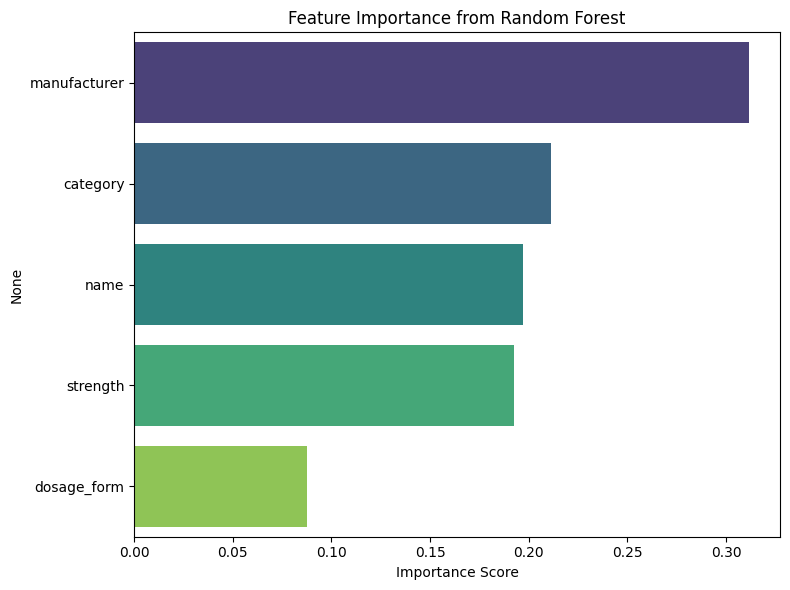

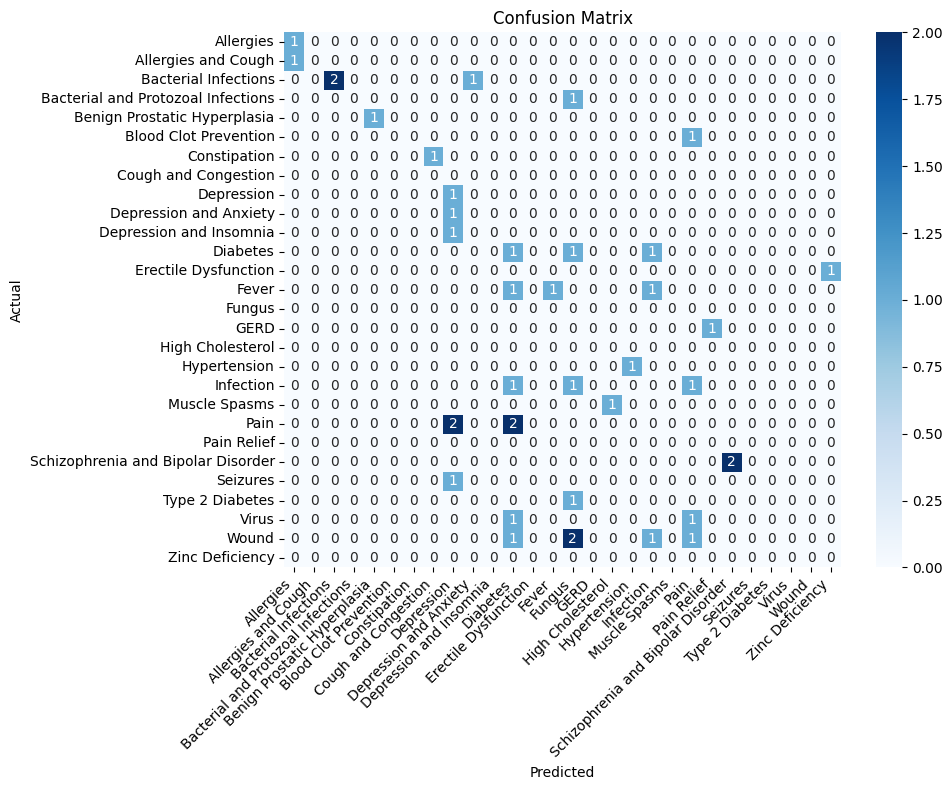

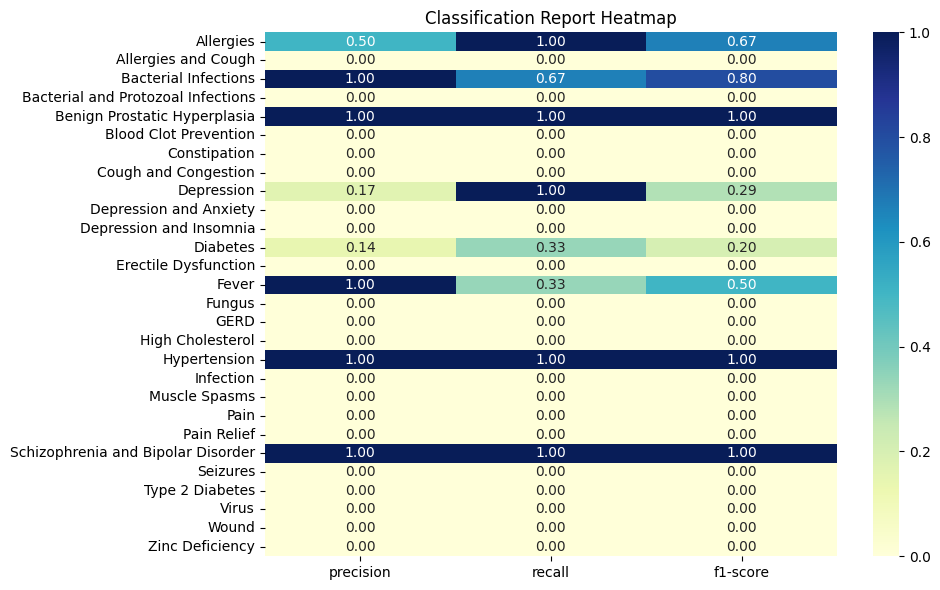

In [2]:
#visualization & Model insights

import pandas as pd
import numpy as np
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

# Load the cleaned dataset
df = pd.read_csv("data/cleaned_medicine_dataset.csv")

# Load encoders
label_encoders = joblib.load("model/label_encoders_dict.joblib")
target_encoder = joblib.load("model/label_encoder_target.joblib")

# Encode features
X = df.drop(columns=['indication'])
y = target_encoder.transform(df['indication'])

for col in X.select_dtypes(include='object').columns:
    le = label_encoders[col]
    X[col] = le.transform(X[col])

# Train-test split (same seed as training)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Load the trained model
model = joblib.load("model/random_forest_model.joblib")

# Predict on test data
y_pred = model.predict(X_test)

# =========================
# 🔹 1. Feature Importance
# =========================
importances = model.feature_importances_
feature_names = X.columns
feat_imp = pd.Series(importances, index=feature_names).sort_values(ascending=False)

plt.figure(figsize=(8, 6))
sns.barplot(x=feat_imp.values, y=feat_imp.index, hue=None, palette="viridis", legend=False)
plt.title("Feature Importance from Random Forest")
plt.xlabel("Importance Score")
plt.tight_layout()
plt.show()

# =========================
# 🔹 2. Confusion Matrix
# =========================
cm = confusion_matrix(y_test, y_pred)
class_names = target_encoder.inverse_transform(sorted(set(y_test) | set(y_pred)))

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# =========================
# 🔹 3. Classification Report Heatmap
# =========================
report = classification_report(
    y_test, y_pred, target_names=class_names, output_dict=True, zero_division=0
)
report_df = pd.DataFrame(report).transpose()

# Filter only classes, not 'accuracy', 'macro avg', etc.
report_df_classes = report_df.iloc[:-3, :]

plt.figure(figsize=(10, 6))
sns.heatmap(report_df_classes[['precision', 'recall', 'f1-score']], annot=True, cmap="YlGnBu", fmt=".2f")
plt.title("Classification Report Heatmap")
plt.tight_layout()
plt.show()
